In [1]:
import cv2 
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

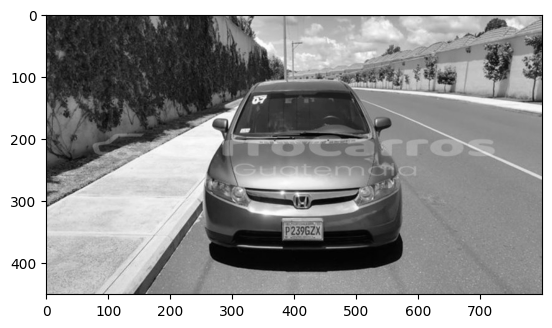

In [2]:
placa = []
image = cv2.imread('big_with_watermark_91.2.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

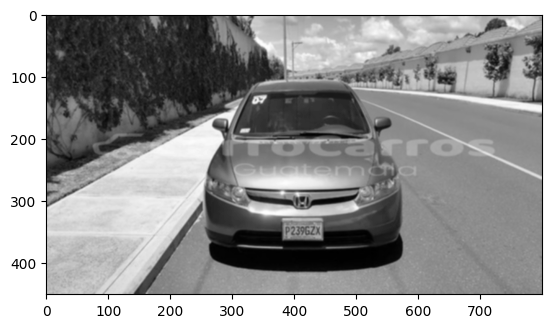

In [3]:
gray = cv2.blur(gray,(3,3))
plt.imshow(gray,cmap='gray')

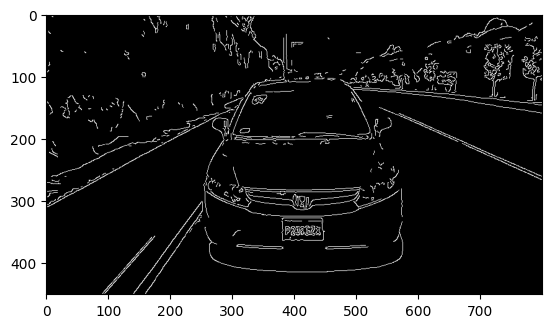

In [4]:

canny = cv2.Canny(gray,150,200)
plt.imshow(canny,cmap='gray')

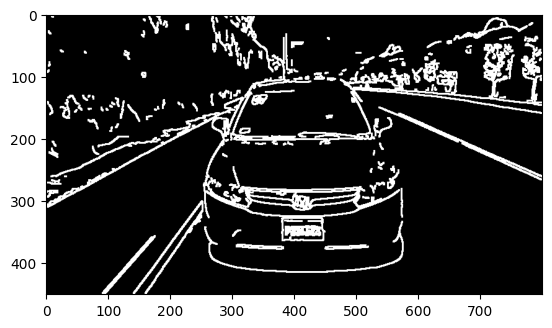

In [5]:
canny = cv2.dilate(canny, None , iterations=1)
plt.imshow(canny,cmap='gray')

In [6]:
# _ , cnts , _ = cv2.findContours(canny , cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE) #opcenCV 3
cnts , _ = cv2.findContours(canny , cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE) #opcenCV4

In [7]:
cnts[1][1]

array([[373, 375]], dtype=int32)

In [8]:
for c in cnts:
    area = cv2.contourArea(c)
    #if area > 8000: print(area)
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4 and area > 9000:
        print('area: ', area)
        print("W: ", w)
        print("H: ", h)
        aspec_ratio = float(w)/h
        print('Relacion de aspecto: ',aspec_ratio)
        
        cv2.drawContours(image, [approx],0, (0,255,0),3)
        if aspec_ratio > 3:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa,config = '--psm 11').strip()
            print("Placa: ", text)
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)

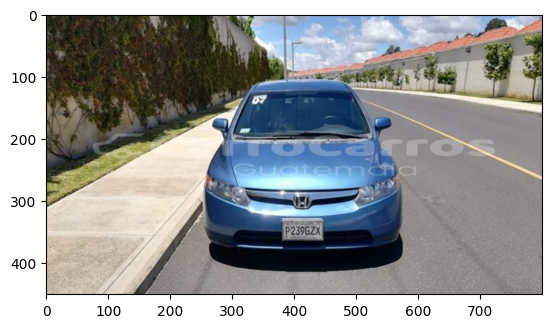

In [9]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))